In [1]:
from pandas import read_csv

In [12]:
from Models.simple_VAE import VAE,loss_function
from sklearn.preprocessing import MinMaxScaler
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from time import sleep
import numpy as np
import pandas as pd




darray = np.loadtxt('data/wine2.csv',delimiter=',')
scaler = MinMaxScaler()
scaler.fit(darray)
dout = scaler.transform(darray)


In [4]:
   #Sending scaled data to device
device = torch.device("cpu")
dtensor = torch.FloatTensor(dout)
    


model = VAE(num_feats = 14).to(device)

print(model)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.train()

loss_store = []

VAE(
  (fc1): Linear(in_features=14, out_features=400, bias=True)
  (fc11): Linear(in_features=400, out_features=300, bias=True)
  (fc12): Linear(in_features=300, out_features=200, bias=True)
  (fc21): Linear(in_features=200, out_features=3, bias=True)
  (fc22): Linear(in_features=200, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=200, bias=True)
  (fc31): Linear(in_features=200, out_features=300, bias=True)
  (fc32): Linear(in_features=300, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=14, bias=True)
)


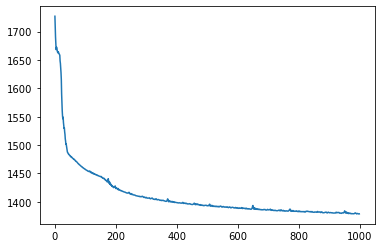

In [5]:
for epoch in range(1000): 
    drecon,mu,log_var =  model(dtensor)
    optimizer.zero_grad()
    loss = loss_function(drecon, dtensor, mu, log_var)
    loss.backward()
    optimizer.step()


    loss_store.append(loss.item())

        # if epoch %100 == 0:
       
       
        #     print(loss.item())




    
plt.plot(loss_store)
plt.show()

In [23]:
#reconstructed dataframe
rcd = pd.DataFrame(scaler.inverse_transform(drecon.detach().numpy()))

In [24]:
#orginal_dataframe
ogd = pd.DataFrame(scaler.inverse_transform(dout))

In [45]:
mnist = torch.utils.data.DataLoader(datasets.MNIST('./data',train=False, transform=transforms.ToTensor()), batch_size=10, shuffle=True)

In [63]:
model = VAE(num_feats = 28).to(device)

print(model)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.train()





for i, (data, _) in enumerate(mnist):
            data = data.to(device)
            img = data.detach().numpy()
            print(np.shape(img))
            #plt.imshow(data[0,0,:,:])
            
            
            drecon,mu,log_var =  model(data)
            optimizer.zero_grad()
            loss = loss_function(drecon, data, mu, log_var)
            loss.backward()
            optimizer.step()
            
            
            

VAE(
  (fc1): Linear(in_features=28, out_features=400, bias=True)
  (fc11): Linear(in_features=400, out_features=300, bias=True)
  (fc12): Linear(in_features=300, out_features=200, bias=True)
  (fc21): Linear(in_features=200, out_features=3, bias=True)
  (fc22): Linear(in_features=200, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=200, bias=True)
  (fc31): Linear(in_features=200, out_features=300, bias=True)
  (fc32): Linear(in_features=300, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=28, bias=True)
)
(10, 1, 28, 28)


ValueError: Using a target size (torch.Size([560, 14])) that is different to the input size (torch.Size([280, 28])) is deprecated. Please ensure they have the same size.